In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [3]:
data = pd.read_csv('data/d2324.csv')
data

,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,info_collect,infra,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,1.0,6.0,1.0,1,1,2.0,3.0,4.0,2023,8
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,3.0,3.0,3.0,1,2,2.0,9.0,7.0,2023,11
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,1,5,NaN,NaN,NaN,2023,1
3,3,10,1,5,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,NaN,NaN,1,3,NaN,NaN,NaN,2023,15
4,4,11,3,4,5.0,5.0,NaN,5.0,NaN,NaN,...,4.0,3.0,2.0,1,2,8.0,3.0,7.0,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,32407,19273,2,4,4.0,4.0,5.0,NaN,NaN,NaN,...,4.0,5.0,3.0,1,1,5.0,4.0,7.0,2024,3
32408,32408,19274,2,5,5.0,5.0,NaN,NaN,NaN,NaN,...,1.0,4.0,12.0,1,1,9.0,2.0,7.0,2024,2
32409,32409,19275,1,4,4.0,5.0,5.0,NaN,NaN,NaN,...,1.0,7.0,13.0,1,1,5.0,7.0,NaN,2024,13
32410,32410,19277,2,5,5.0,5.0,5.0,NaN,5.0,NaN,...,1.0,1.0,3.0,1,1,2.0,4.0,6.0,2024,3


In [9]:
# 분석할 컬럼들
part_cols = [
    "part_food", "part_shop", "part_nature", "part_history", "part_tradition",
    "part_gallery", "part_kpop", "part_performance", "part_festival", "part_fun",
    "part_entertainment", "part_beauty", "part_heal", "part_sport_view", 
    "part_sport_part", "part_conference", "part_business", "part_study", "part_etc"
]

money_col = "money_total"

results = {}
for col in part_cols:
    if col in data.columns:
        total_money = data.loc[data[col].astype(str) == "1", money_col].sum()
        results[col] = total_money

result_df = pd.DataFrame(list(results.items()), columns=["Category", "Money_Total"])
print(result_df)

              Category  Money_Total
0            part_food          0.0
1            part_shop          0.0
2          part_nature          0.0
3         part_history          0.0
4       part_tradition          0.0
5         part_gallery          0.0
6            part_kpop          0.0
7     part_performance          0.0
8        part_festival          0.0
9             part_fun          0.0
10  part_entertainment          0.0
11         part_beauty          0.0
12           part_heal          0.0
13     part_sport_view          0.0
14     part_sport_part          0.0
15     part_conference          0.0
16       part_business          0.0
17          part_study          0.0
18            part_etc          0.0


In [10]:
for col in part_cols:
    if col in data.columns:
        print(col, data[col].unique())


part_food [ 1. nan]
part_shop [ 2. nan]
part_nature [nan  3.]
part_history [nan  4.]
part_tradition [nan  5.]
part_gallery [nan  6.]
part_kpop [nan  7.]
part_performance [ 8. nan]
part_festival [nan  9.]
part_fun [nan 10.]
part_entertainment [nan 11.]
part_beauty [nan 12.]
part_heal [nan 13.]
part_sport_view [nan 14.]
part_sport_part [nan 15.]
part_conference [nan 16.]
part_business [nan 17.]
part_study [nan 18.]
part_etc [nan 19. 17. 16.]


In [12]:
part_cols = [
    "part_food", "part_shop", "part_nature", "part_history", "part_tradition",
    "part_gallery", "part_kpop", "part_performance", "part_festival", "part_fun",
    "part_entertainment", "part_beauty", "part_heal", "part_sport_view", 
    "part_sport_part", "part_conference", "part_business", "part_study", "part_etc"
]

money_col = "money_total"

# 각 변수별 해당 번호 매핑
part_numbers = {col: i+1 for i, col in enumerate(part_cols)}

results = {}
for col in part_cols:
    if col in data.columns:
        code_num = part_numbers[col]
        total_money = data.loc[data[col] == code_num, money_col].sum()
        results[col] = total_money

result_df = pd.DataFrame(list(results.items()), columns=["Category", "Money_Total"])
print(result_df)


              Category  Money_Total
0            part_food  49541459.59
1            part_shop  57062788.56
2          part_nature  40312784.36
3         part_history  25453822.93
4       part_tradition  25236396.32
5         part_gallery  20403208.86
6            part_kpop  13989472.86
7     part_performance   5449968.77
8        part_festival   4102676.58
9             part_fun   8347143.75
10  part_entertainment  12235883.09
11         part_beauty  10080250.56
12           part_heal   7124880.43
13     part_sport_view   3830995.20
14     part_sport_part   2994462.91
15     part_conference   3017881.80
16       part_business   9893795.06
17          part_study   9954141.71
18            part_etc   3106171.84


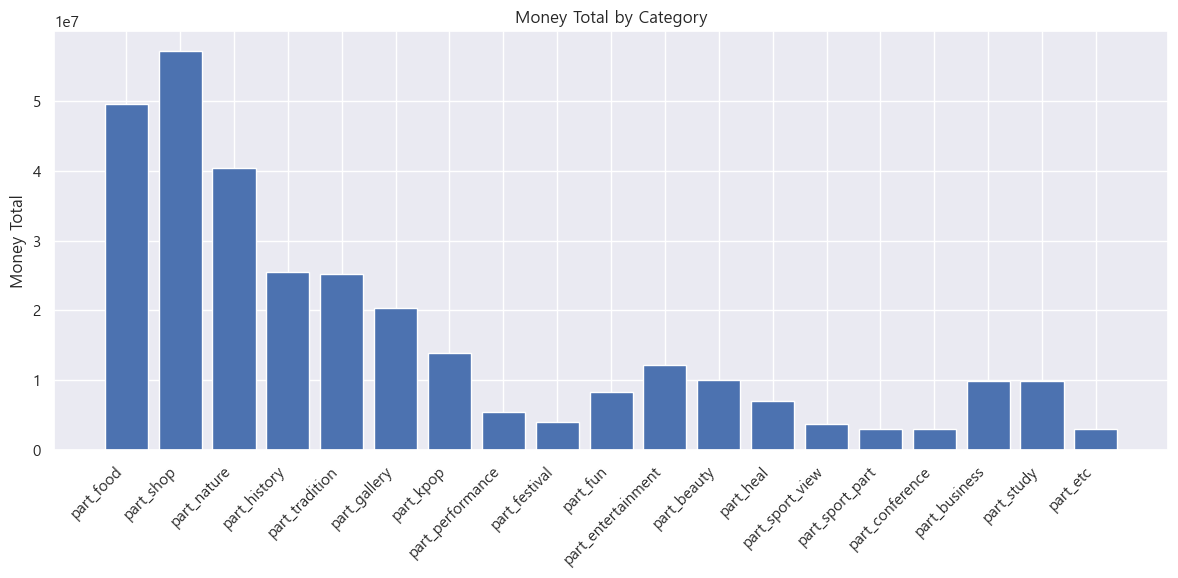

In [13]:
# Money_Total 반올림 (정수화)
result_df["Money_Total"] = result_df["Money_Total"].round(0)

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(result_df["Category"], result_df["Money_Total"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Money Total")
plt.title("Money Total by Category")
plt.tight_layout()
plt.show()